<a href="https://colab.research.google.com/github/derektorquette/pln-com-deep-learning-ia-expert/blob/main/classifica%C3%A7%C3%A3o_de_sentimentos_redes_neurais_convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das bibliotecas

In [ ]:
import numpy as np # cientifica do python
import math # recursos matemáticos
import re # regex
import pandas as pd # base de dados
from bs4 import BeautifulSoup # pre processamento em textos
from google.colab import drive # drive
import zipfile # descompactar
import seaborn as sns # graficos visuais
import spacy as sp # pln - pre processamento
import string # pre processamento
import random # numeros aleatórios
import matplotlib.pyplot as plt # geracao de gráficos

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# Etapa 2: Pré-processamento dos dados

## Carregamento dos arquivos

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '//content/drive/MyDrive/CURSOS LIVRES FORMAÇÃO COMPLEMENTAR/3. Udemy/TensorFlow, Deep Learning e Python: Construa um Chatbot/trainingandtestdata (1).zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text'] # colunas

In [ ]:
train_data = pd.read_csv('/content/trainingandtestdata/train.csv', header = None,
                         names = cols, engine = 'python', encoding = 'latin1')

In [ ]:
train_data.shape

(1600000, 6)

In [ ]:
train_data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
train_data.tail() # os ultimos

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
train_data.sentiment.unique()

array([0, 4])

In [ ]:
sns.countplot(train_data.sentiment);

In [13]:
test_data = pd.read_csv("/content/trainingandtestdata/test.csv",
    header=None,
    names=cols,
    engine="python",
    encoding="latin1"
)

In [14]:
test_data.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [15]:
test_data.shape

(498, 6)

In [16]:
test_data.sentiment.unique()

array([4, 0, 2])

<Axes: ylabel='count'>

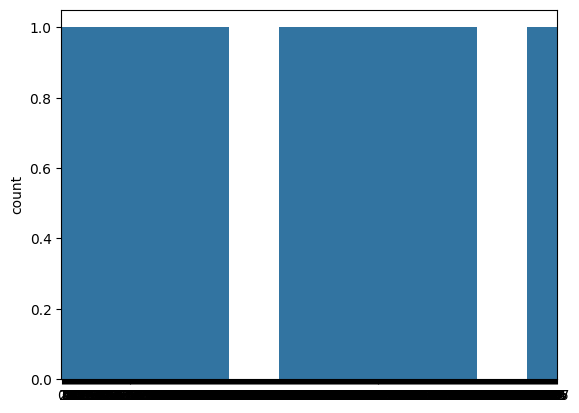

In [18]:
sns.countplot(test_data.sentiment)

## Pré-processamento

## Limpeza da base de dados

In [20]:
data = train_data

In [21]:
data.drop(['id', 'date', 'query', 'user'], axis = 1, inplace=True) # apagar

In [22]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [43]:
X = data.iloc[:, 1].values

In [44]:
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [45]:
X.shape

(1600000,)

In [46]:
type(X)

numpy.ndarray

In [47]:
y = data.iloc[:, 0].values
y

array([0, 0, 0, ..., 4, 4, 4])

In [48]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

In [49]:
X.shape

(240000,)

In [50]:
y.shape

(240000,)

In [51]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 4]), array([120000, 120000]))

## Limpeza dos textos

In [57]:

def clean_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet) # retiar o nome do usuario
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet) # retirar a url
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet) # remover os espaços
  return tweet

In [54]:
text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D"

In [56]:
text = clean_tweets(text)
text

'Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

## Pré-Processamento Adicional

- remoção das Stopwords

In [59]:
nlp = sp.load("en_core_web_sm")
nlp

In [60]:
stop_words = sp.lang.en.STOP_WORDS

In [ ]:
print(stop_words)

In [62]:
len(stop_words)

326

In [66]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
def clean_tweets2(tweet):
  tweet = tweet.lower() # conversão para minusculas
  document = nlp(tweet)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation] # remoção das stopwords
  words = ' '.join([str(element) for element in words]) # retornar o texto como string

  return words

In [ ]:
# Awww that's a bummer. You shoulda got David Carr of Third Day to do it. D"

In [74]:
text2 = clean_tweets2(text)
text2

'awww s bummer shoulda got david carr day d'

In [75]:
data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

<ipython-input-57-b1969230b9e0>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


## 44 minutos para executar

In [77]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

wants maddie
  nooooooooooo nt want
  ok suprises
t believe m s getting light outside ... don t wanna bed
  ish guys try look ish sad
  good deal brother tibco b game avc weekend plans changed enjoy france don t cu
  ll try aenough noise er stench try twitterville busy
m gone twitter goodnight ..
way home icha s birthday dinner happy birthday ichalinaaa
  pushin b c evntually ull look realize uve tunnel vision says


In [78]:
data_labels = y

In [79]:
data_labels[data_labels == 4] = 1 # transformando 4 em 1 porque usamos uma função sigmóide

In [80]:
data_labels

array([0, 0, 0, ..., 0, 1, 1])

In [81]:
np.unique(data_labels)

array([0, 1])

### Tokenização - tranformar as palavras em números

In [82]:
2**16

65536

In [83]:
import math
math.pow(2, 16)

65536.0

In [85]:
#tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [86]:
tokenizer.vocab_size

52843

In [ ]:
print(tokenizer.subwords)

In [88]:
ids = tokenizer.encode('i am happy')
ids

[262, 4789, 371]

In [89]:
text = tokenizer.decode(ids)
text

'i am happy'

In [90]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [91]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[1, 17036, 1987, 19, 379, 71, 878, 4417, 2127, 7518]
[1, 94, 1002, 1709]
[1, 5083, 2, 227, 6, 6, 1131, 2982, 3425, 403, 16]
[1, 50, 1763, 3, 69, 1608, 21, 135, 8, 14, 52703]
[1, 132, 5267]
[3, 767, 377, 1654, 5, 22555, 3560, 1347, 57, 4, 23, 252, 1896]
[2550, 1439, 21, 100, 2093]
[1, 117, 3, 518, 482, 303, 4239, 845, 19149, 52702, 52633]
[1, 3, 96, 5057]
[1, 272, 820, 757, 1396, 859, 2796, 276, 781, 201, 4, 4545, 1162, 16]


### Padding

In [93]:
max_len = max([len(sentence) for sentence in data_inputs]) #setença que tem mais caracter
max_len

54

In [94]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [96]:
# retornando a setença com os paddings
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[    1    59   109   155  1369  3376     8   274   360 11645     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
[    1  9129     7 47400     2 10514   490    93     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
[    1     3    59    77   182    92   463     2  1112    15    12    44
    40   112   188    55 28833     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
[ 107   61

### Divisão da base de dados em treinamento e teste



In [97]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [98]:
train_inputs[0]

array([    1, 11019,  6249,    11,    52,    39,  4422,   140,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [103]:
train_inputs.shape

(168000, 54)

In [100]:
train_labels.shape

(168000,)

In [101]:
test_inputs.shape

(72000, 54)

In [102]:
test_labels.shape

(72000,)

# Etapa 3: Construção do modelo

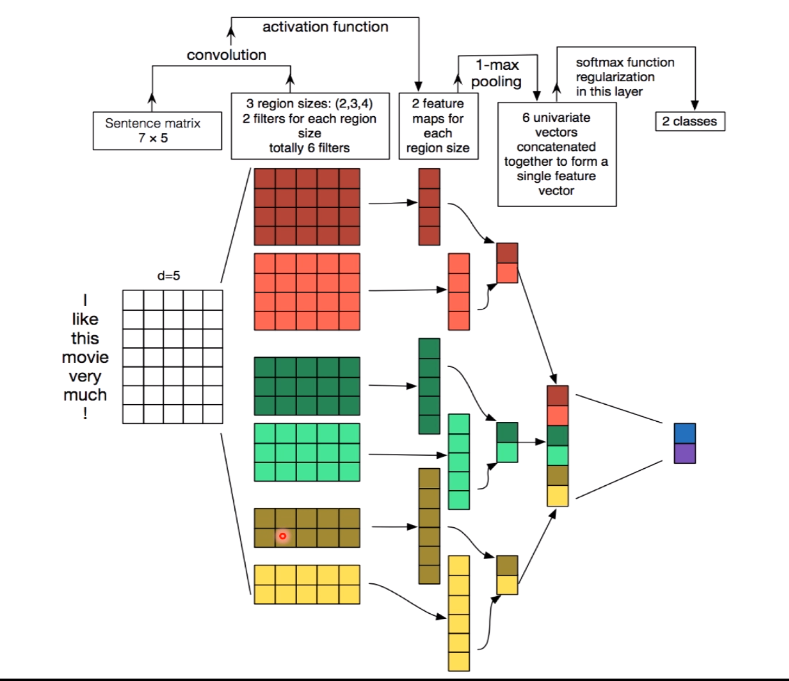

In [104]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    # camadas de convolução

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    # pooling - pegar o maior valor de dentro do vetor

    self.pool = layers.GlobalMaxPool1D()

    # parte densa da rede neural

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax') # adicional, softmax retorna mais valores. Usar em mais de 2 classes

    # ligação entre as camadas

  def call(self, inputs, training):
    x = self.embedding(inputs) # começamos o modelo com a camada de embedding
    x_1 = self.bigram(x) # ligando o 'x' com a camada brigrama
    x_1 = self.pool(x_1) # ligando com a camada de pooling
    x_2 = self.trigram(x) # "
    x_2 = self.pool(x_2)  # "
    x_3 = self.fourgram(x) # "
    x_3 = self.pool(x_3) # "

    # rede neural densa - concatenação

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged) # concatenação dos dados para a camada densa
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Etapa 4: Treinamento

## Configuração dos parâmetros

In [105]:
vocab_size = tokenizer.vocab_size
vocab_size

52843

In [107]:
emb_dim = 200 # precisa fazer o tuning dos parâmetros
nb_filters = 100 # total de 300 filtros
ffn_units = 256 # 256 neuronios na camada escondida
batch_size = 64 # ajuste dos pesos entre 64 e 64 registros
nb_classes = len(set(train_labels))
nb_classes

2

In [109]:
dropout_rate = 0.2
nb_epochs = 5 # número de épocas

## Treinamento

In [110]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [112]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored')

In [114]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
ckpt_manager.save()

Epoch 1/5
2363/2363 [==============================] - 842s 355ms/step - loss: 0.5048 - accuracy: 0.7503 - val_loss: 0.4836 - val_accuracy: 0.7621
Epoch 2/5
2363/2363 [==============================] - 826s 349ms/step - loss: 0.3658 - accuracy: 0.8372 - val_loss: 0.5194 - val_accuracy: 0.7556
Epoch 3/5
2363/2363 [==============================] - 816s 345ms/step - loss: 0.1928 - accuracy: 0.9203 - val_loss: 0.7038 - val_accuracy: 0.7401
Epoch 4/5
2363/2363 [==============================] - 818s 346ms/step - loss: 0.1012 - accuracy: 0.9584 - val_loss: 1.0523 - val_accuracy: 0.7277
Epoch 5/5
2363/2363 [==============================] - 811s 343ms/step - loss: 0.0688 - accuracy: 0.9712 - val_loss: 1.2293 - val_accuracy: 0.7178


'./ckpt-1'

# Etapa 5: Avaliação do modelo

## Avaliação - base de dados de teste

In [115]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

1125/1125 [==============================] - 43s 38ms/step - loss: 1.2060 - accuracy: 0.7224
[1.2059745788574219, 0.7224166393280029]


In [116]:
y_pred_test = Dcnn.predict(test_inputs)

2250/2250 [==============================] - 48s 21ms/step


In [121]:
y_pred_test

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [122]:
y_pred_test = (y_pred_test > 0.5)

In [126]:
y_pred_test

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [127]:
test_labels

array([0, 1, 0, ..., 1, 0, 1])

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[25885, 10115],
       [ 9871, 26129]])

<Axes: >

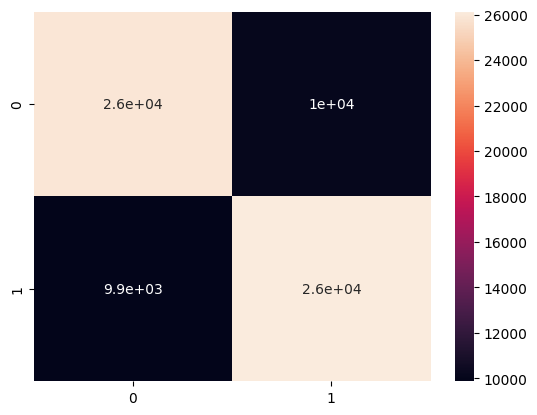

In [130]:
sns.heatmap(cm, annot=True)

In [131]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

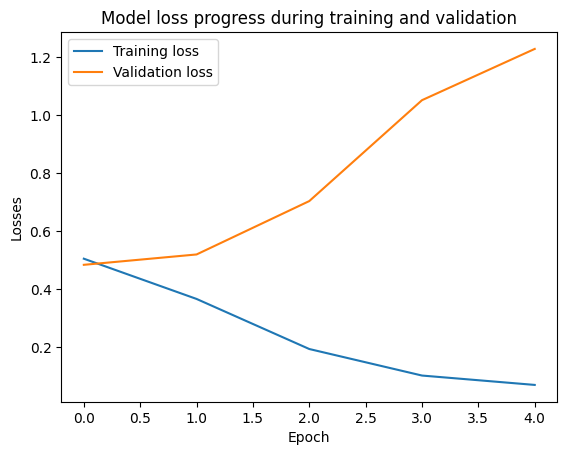

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

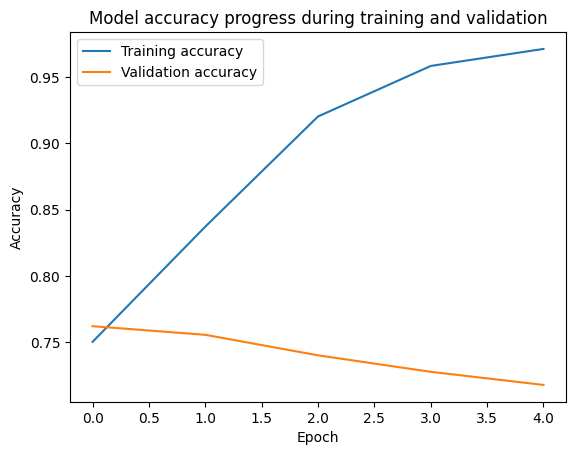

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

## Previsões

In [141]:
text = 'you are very beautiful'
text = tokenizer.encode(text)
text

[4060, 11612, 24410, 1485]

In [142]:
Dcnn(np.array([text]), training=False).numpy()

array([[0.9960923]], dtype=float32)